In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('AB_NYC_2019.csv')


In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb_data = df
airbnb_data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
airbnb_data = airbnb_data.drop(columns=['reviews_per_month','last_review','id','host_id'])
airbnb_data.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
airbnb_data.dropna(inplace=True)
airbnb_data.isna().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [6]:
airbnb_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,40.728941,-73.952170,152.740309,7.012444,23.273098,7.148369,112.801425
std,0.054528,0.046159,240.232386,20.019757,44.549898,32.964600,131.610962
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763107,-73.936280,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [7]:
airbnb_data.dtypes

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

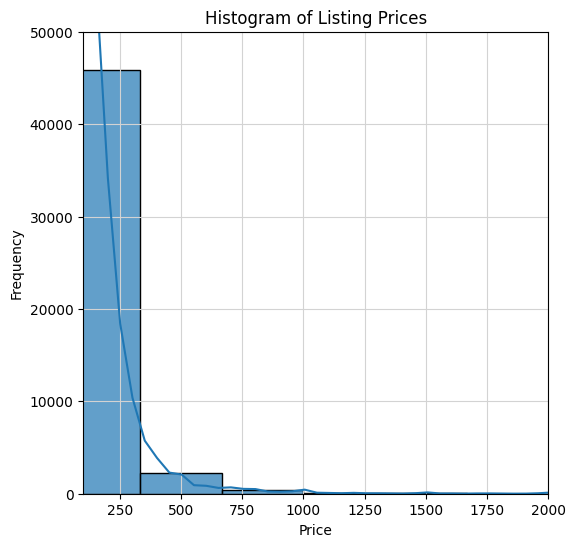

In [21]:
plt.figure(figsize=(6, 6))
plt.grid(color='lightgrey', zorder=0)
sns.histplot(airbnb_data['price'], bins=30, kde=True,edgecolor='black', alpha=0.7)
plt.title('Histogram of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(100, 2000)  # Set limits for x-axis (zooming in)
plt.ylim(0, 50000)
plt.show()

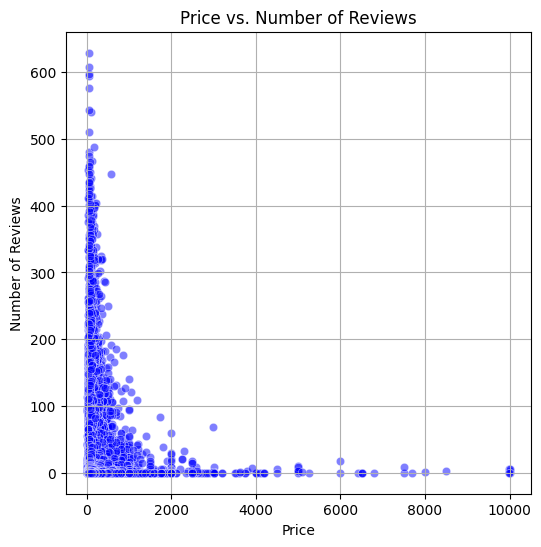

In [25]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=airbnb_data, x='price', y='number_of_reviews', color='blue', alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

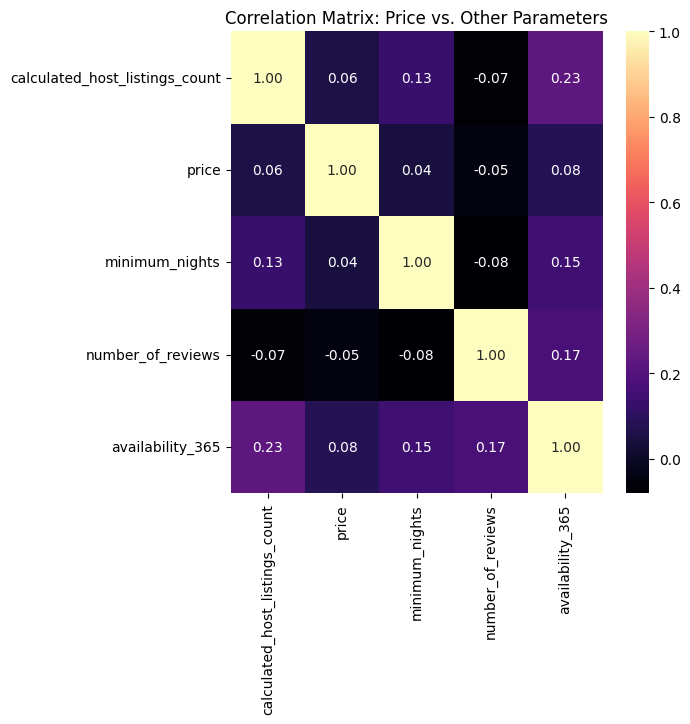

In [24]:

numerical_columns = airbnb_data[['calculated_host_listings_count', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix: Price vs. Other Parameters')
plt.show()
